# **DATASCI 315, Group Work Assignment 2**

**Instructions:** During lab section, and afterward as necessary, you will collaborate in two-person teams (assigned by the GSI) to complete the problems that are interspersed below. The GSI will help individual teams encountering difficulty, make announcements addressing common issues, and help ensure progress for all teams. **During lab, feel free to flag down your GSI to ask questions at any point!** Upon completion, one member of the team should submit their team's work through Canvas **as html**.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Part 1: Shallow Neural Networks

In this section, we will use PyTorch to build a shallow neural network from scratch. **Important:** Do not use PyTorch's autograd (automatic differentiation) for this assignment. We will implement everything manually using only tensor operations.

The ingredients we need include:
1. Single layer
2. Activation
3. Loss

Later we will use PyTorch's automatic differentiation (autograd) to train models using backpropagation. Here, our focus is on the network's forward pass.

### ReLU Activation Function

The ReLU (Rectified Linear Unit) activation function is defined as:
$$\text{ReLU}(x) = \max \{0, x\}$$

This function will be used in our neural network implementation.

In [2]:
def relu(x):
    return torch.maximum(x, torch.zeros_like(x))

### Regression

This is a regression problem. The goal is to find a function $f(\cdot|\Theta)$ parametrized by $\Theta$ (weights and biases of the network) such that $y_i\approx f(x_i|\Theta)$ given observations $x_1,\dots,x_n$ and corresponding outputs $y_1,\dots,y_n$.

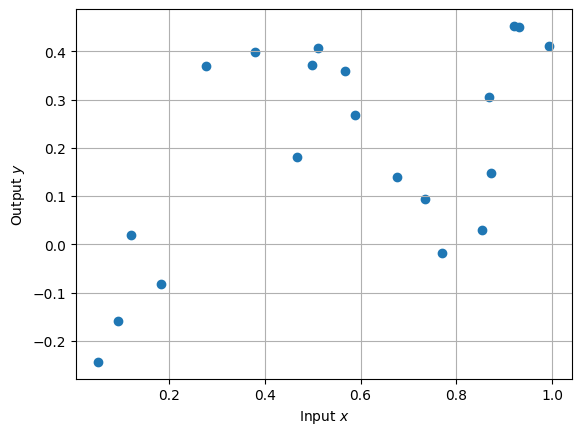

In [3]:
# Training data for regression
x_train = torch.tensor(
    [
        0.09291784,
        0.46809093,
        0.93089486,
        0.67612654,
        0.73441752,
        0.86847339,
        0.49873225,
        0.51083168,
        0.18343972,
        0.99380898,
        0.27840809,
        0.38028817,
        0.12055708,
        0.56715537,
        0.92005746,
        0.77072270,
        0.85278176,
        0.05315950,
        0.87168699,
        0.58858043,
    ]
)
y_train = torch.tensor(
    [
        -0.15934537,
        0.18195445,
        0.451270150,
        0.13921448,
        0.09366691,
        0.30567674,
        0.372291170,
        0.40716968,
        -0.08131792,
        0.41187806,
        0.36943738,
        0.3994327,
        0.019062570,
        0.35820410,
        0.452564960,
        -0.0183121,
        0.02957665,
        -0.24354444,
        0.148038840,
        0.26824970,
    ]
)
plt.scatter(x_train, y_train)
plt.xlabel("Input $x$")
plt.ylabel("Output $y$")
plt.grid()
plt.show()

A shallow network can be thought of as a single layer of hidden units, but our code will be versatile enough to cover much more.

#### **A Linear Layer Implementation**

Let us use PyTorch to create a class `Linear` that models a single linear transformation. To initialize an instance of this class, you need to provide `in_features` and `out_features`. The attributes saved during initialization include `weights` and `bias` of appropriate sizes, initialized as uniform random numbers between -1 and 1.

We can use the magic method `__call__` to apply an instantiated `Linear` object to a tensor of conformable dimensions, like a function. Calling it on an input tensor $X$ of shape `(n, d)` where `d` equals `in_features` should return $Y=X A^\top + b$, where $A$ is the `weights` attribute and $b$ is the `bias`. Note that $Y$ has shape `(n, p)` with `p` equal to `out_features`.

**Shapes:** `weights` (i.e., $A$) should have shape `(p, d)` and `bias` (i.e., $b$) should have shape `(p,)`.

**Note:** This is similar to `torch.nn.Linear`, which we will use when we start working with PyTorch's neural network module.

---

In [4]:
class Linear:
    def __init__(self, in_features, out_features):
        # initialize
        self.in_features = in_features
        self.out_features = out_features
        # Initialize weights uniformly between -1 and 1
        self.weights = torch.rand(out_features, in_features) * 2 - 1  # weights A
        self.bias = torch.rand(out_features) * 2 - 1  # bias b

    def __call__(self, x):
        # check conformable input
        assert len(x.shape) == 2, "Input must be 2D"
        assert x.shape[1] == self.in_features, "Input features must match"
        # return Y=X A^T + b
        return x @ self.weights.T + self.bias

In [5]:
m = Linear(in_features=2, out_features=5)  # input has 2 features, output has 5 features
X = torch.rand(100, 2)  # (n=100, d=2)
y = m(X)  # (n=100, p=5)
y.shape

torch.Size([100, 5])

For each individual $x$, note that the linear layer performs the following:
$$y_j = \sum_{i=1}^{d} A_{ji}x_i + b_j, \quad j=1,\dots, p.$$
Thus, $A_{ji}$ is the weight attached for the connection between the $i$th coordinate of input and the $j$th coordinate of output. Now, let us add an activation function to our network.

#### **(10 pts) Problem 1: Building a Simple Neural Network**

Build a class `SimpleNetwork` by filling in the parts in the provided code block below. Use the `Linear` class implemented above and the `relu` function. The network architecture is:

$$
\text{input } x 
\;\xrightarrow{\text{Linear}}\;
\text{hidden layer (}n_{\text{hidden}}\text{ units)}
\;\xrightarrow{\text{ReLU}}\;
\text{activated hidden layer}
\;\xrightarrow{\text{Linear}}\;
\text{output } \hat{y}
$$

This is a regression problem, so the output is a scalar.

Take `n_hidden` as a parameter when initializing the class—this is the number of hidden units. Note that a single hidden layer requires two `Linear` transformations:
1. `layer1`: maps from `in_features` to `n_hidden`
2. `layer2`: maps from `n_hidden` to 1 (the output)

Initialize a model from this class using `n_hidden=3`.

---

In [6]:
# complete code here
class SimpleNetwork:
    def __init__(self, in_features, n_hidden=2):
        # BEGIN SOLUTION
        self.layer1 = Linear(in_features, n_hidden)
        self.layer2 = Linear(n_hidden, 1)
        # END SOLUTION

    def forward(self, x):
        # BEGIN SOLUTION
        h = self.layer1(x)
        h = relu(h)
        return self.layer2(h)
        # END SOLUTION


model = SimpleNetwork(
    in_features=1, n_hidden=3
)  # initializing an instance of the class
X = torch.rand(100, 1)
y = model.forward(X)  # should be shape (n, 1)

# Test cases
assert y.shape == (100, 1), f"Output shape should be (100, 1), got {y.shape}"
assert hasattr(model, "layer1"), "Model should have layer1"
assert hasattr(model, "layer2"), "Model should have layer2"
assert model.layer1.in_features == 1, "layer1 should have 1 input feature"
assert model.layer1.out_features == 3, "layer1 should have 3 output features"
assert model.layer2.in_features == 3, "layer2 should have 3 input features"
assert model.layer2.out_features == 1, "layer2 should have 1 output feature"
print(f"Output shape: {y.shape}")
print("All tests passed!")

# BEGIN HIDDEN TESTS
model2 = SimpleNetwork(in_features=4, n_hidden=5)
X2 = torch.rand(50, 4)
y2 = model2.forward(X2)
assert y2.shape == (50, 1), f"Output shape should be (50, 1), got {y2.shape}"
assert model2.layer1.in_features == 4, "layer1 should have 4 input features"
assert model2.layer1.out_features == 5, "layer1 should have 5 output features (n_hidden)"
assert model2.layer2.in_features == 5, "layer2 should have 5 input features"
assert model2.layer2.out_features == 1, "layer2 should have 1 output feature"

model3 = SimpleNetwork(in_features=2, n_hidden=10)
X3 = torch.rand(25, 2)
y3 = model3.forward(X3)
assert y3.shape == (25, 1), f"Output shape should be (25, 1), got {y3.shape}"
assert model3.layer1.out_features == 10, "layer1 should have 10 output features (n_hidden)"
# END HIDDEN TESTS

Output shape: torch.Size([100, 1])
All tests passed!


Comparing with Figure 3.4 in the Textbook (Understanding Deep Learning), the parameters of our model are related to the $\theta$'s and $\phi$'s as follows:

1. First `Linear` weights are $\theta_{11}$, $\theta_{21}$, and $\theta_{31}$
2. First `Linear` biases are $\theta_{10}$, $\theta_{20}$, and $\theta_{30}$
3. Second `Linear` weights are $\phi_1$, $\phi_2$, and $\phi_3$
4. Second `Linear` bias is $\phi_0$

#### **(10 pts) Problem 2: Setting Network Parameters**

(a) Update the parameters of your neural network to match the following values.

**First linear layer** (`layer1`):
- `weights` shape: $(3, 1)$ — each row corresponds to one hidden unit
- `bias` shape: $(3,)$

| Hidden Unit | Weight ($\theta_{k1}$) | Bias ($\theta_{k0}$) |
|-------------|------------------------|----------------------|
| 1           | $-1$                   | $0.3$                |
| 2           | $2$                    | $-1$                 |
| 3           | $0.65$                 | $-0.5$               |

So: `layer1.weights = [[-1], [2], [0.65]]` and `layer1.bias = [0.3, -1, -0.5]`

**Second linear layer** (`layer2`):
- `weights` shape: $(1, 3)$ — connects hidden units to the single output
- `bias` shape: $(1,)$

| Parameter | Value |
|-----------|-------|
| $\phi_1$ (weight for hidden unit 1) | $2$ |
| $\phi_2$ (weight for hidden unit 2) | $-1$ |
| $\phi_3$ (weight for hidden unit 3) | $7$ |
| $\phi_0$ (bias) | $-0.3$ |

So: `layer2.weights = [[2, -1, 7]]` and `layer2.bias = [-0.3]`

(b) Plot the neural network function $f(\cdot;\Theta)$ from 0 to 1 along with the training data.

**Hint:** Access parameters via `model.layer1.weights`, `model.layer1.bias`, etc.

---

In [7]:
# write solution here for (a) - check out the shapes (if needed, go back to Linear)

# BEGIN SOLUTION
model.layer1.weights = torch.tensor([[-1.0], [2.0], [0.65]])
model.layer1.bias = torch.tensor([0.3, -1.0, -0.5])
model.layer2.weights = torch.tensor([[2.0, -1.0, 7.0]])
model.layer2.bias = torch.tensor([-0.3])
# END SOLUTION

# Test cases
assert torch.allclose(model.layer1.weights, torch.tensor([[-1.0], [2.0], [0.65]])), (
    "layer1 weights incorrect"
)
assert torch.allclose(model.layer1.bias, torch.tensor([0.3, -1.0, -0.5])), (
    "layer1 bias incorrect"
)
assert torch.allclose(model.layer2.weights, torch.tensor([[2.0, -1.0, 7.0]])), (
    "layer2 weights incorrect"
)
assert torch.allclose(model.layer2.bias, torch.tensor([-0.3])), "layer2 bias incorrect"
print("All tests passed!")

# BEGIN HIDDEN TESTS
assert model.layer1.weights.shape == (3, 1), "layer1 weights should have shape (3, 1)"
assert model.layer1.bias.shape == (3,), "layer1 bias should have shape (3,)"
assert model.layer2.weights.shape == (1, 3), "layer2 weights should have shape (1, 3)"
assert model.layer2.bias.shape == (1,), "layer2 bias should have shape (1,)"
test_x = torch.tensor([[0.5]])
test_output = model.forward(test_x)
assert test_output.shape == (1, 1), "Forward pass output should have shape (1, 1)"
# END HIDDEN TESTS

All tests passed!


### Loss

The loss quantifies how bad our prediction $\hat{y}$ is with respect to the target outcome $y$. For regression problems, the most commonly used loss is the least squares loss, defined as
$$\text{LeastSquares}(Y,\hat{Y}) = \sum_{i=1}^n (y_i - \hat{y}_i)^2.$$

Often, equivalently, one uses MSE (mean squared error):
$$\text{MSE}(Y,\hat{Y}) = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2.$$

#### **(10 pts) Problem 3: Loss Function**

(a) Implement the least squares loss as a function:
$$\text{LeastSquares}(Y, \hat{Y}) = \sum_{i=1}^n (y_i - \hat{y}_i)^2$$

**Hint:** Be careful with shapes! `y_train` has shape `(n,)`, while the output of the network has shape `(n, 1)`. You may need to flatten or reshape one of the tensors.

(b) What is the value of this loss using the current model on the training data? (If implemented correctly, it should be approximately 9.385.)

---

In [8]:
def least_square_loss(y_true, y_pred):
    # BEGIN SOLUTION
    y_pred = y_pred.flatten()
    y_true = y_true.flatten()
    return torch.sum((y_true - y_pred) ** 2)
    # END SOLUTION


# Compute the loss on the training data
# BEGIN SOLUTION
y_pred = model.forward(x_train[:, None])
l_sq_loss = least_square_loss(y_train, y_pred)
# END SOLUTION


print(f"Least squares loss: {l_sq_loss:.3f}")

# Test cases
assert torch.isclose(
    least_square_loss(torch.tensor([1.0, 2.0, 3.0]), torch.tensor([1.0, 2.0, 3.0])),
    torch.tensor(0.0),
), "Loss should be 0 for identical tensors"
assert torch.isclose(
    least_square_loss(torch.tensor([0.0, 0.0]), torch.tensor([1.0, 1.0])),
    torch.tensor(2.0),
), "Loss should be 2 for [0,0] vs [1,1]"
assert torch.isclose(l_sq_loss, torch.tensor(9.385), atol=0.01), (
    f"Loss should be ~9.385, got {l_sq_loss:.3f}"
)
print("All tests passed!")

# BEGIN HIDDEN TESTS
assert torch.isclose(
    least_square_loss(torch.tensor([1.0, 2.0, 3.0, 4.0]), torch.tensor([2.0, 3.0, 4.0, 5.0])),
    torch.tensor(4.0),
), "Loss should be 4 for tensors differing by 1 each (4 elements)"
assert torch.isclose(
    least_square_loss(torch.tensor([0.0, 0.0, 0.0]), torch.tensor([3.0, 4.0, 0.0])),
    torch.tensor(25.0),
), "Loss should be 25 for [0,0,0] vs [3,4,0]"
# END HIDDEN TESTS

Least squares loss: 9.385
All tests passed!


What remains? **Training the network**—that is, learning the weights and biases such that the loss is minimized. This is achieved through gradient descent and backpropagation, which we will not cover today.

#### **Fun parameter optimization without gradients**

Although we cannot use backpropagation yet, we can still perform a mini grid search. Let us use a model with `n_hidden=2`. This is a shallow network with 7 parameters (why?). Let $V$ be a uniformly spaced grid of 5 values between -1 and 1.

**Plan:** For each combination of parameters from this grid, compute the loss and choose the model with the minimum loss.

Note: Even with this small network and only 5 values to search over, this requires checking each of $5^7\approx 78000$ possible combinations, so it might take a while (runs in $< 5$ seconds on Colab). Clearly, with larger networks or bigger grids this is **not feasible** at all!

Make sure your `SimpleNetwork` object (Problem 1) is correctly implemented. Running the following cell block will perform this grid search.

---

In [9]:
model1 = SimpleNetwork(in_features=1, n_hidden=2)  # create model

V = torch.linspace(-1, 1, 5)  # create the grid

min_loss = float("inf")  # to keep track of loss

for a1 in V:
    for a2 in V:
        for a3 in V:
            for a4 in V:
                for a5 in V:
                    for a6 in V:
                        for a7 in V:
                            # assign the parameters
                            model1.layer1.weights = torch.tensor([[a1], [a2]])
                            model1.layer2.weights = torch.tensor([[a3, a4]])
                            model1.layer1.bias = torch.tensor([a5, a6])
                            model1.layer2.bias = torch.tensor([a7])

                            # predict on training data and get loss
                            y_predicted = model1.forward(x_train[:, None])
                            loss = least_square_loss(y_train, y_predicted)

                            # if loss improves, store required quantities
                            if loss < min_loss:
                                min_loss = loss.item()
                                best_params = (a1, a2, a3, a4, a5, a6, a7)

min_loss

0.5450479388237

If done correctly, the loss should be much better than that in Problem 2 (around 0.54). You can see what the current network function looks like by running the following block:

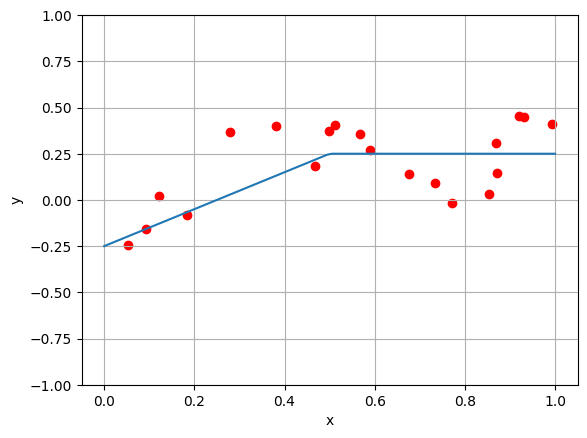

In [10]:
a1, a2, a3, a4, a5, a6, a7 = best_params
model1.layer1.weights = torch.tensor([[a1], [a2]])
model1.layer2.weights = torch.tensor([[a3, a4]])
model1.layer1.bias = torch.tensor([a5, a6])
model1.layer2.bias = torch.tensor([a7])

x = torch.linspace(0, 1, 100)
y = model1.forward(x[:, None])
plt.plot(x, y.detach())
plt.scatter(x_train, y_train, color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-1, 1)
plt.grid()
plt.show()

### Classification

Using the tools we have built so far, it should be easy to construct a neural network for a classification problem. Here is a simulated dataset we will use as training data:

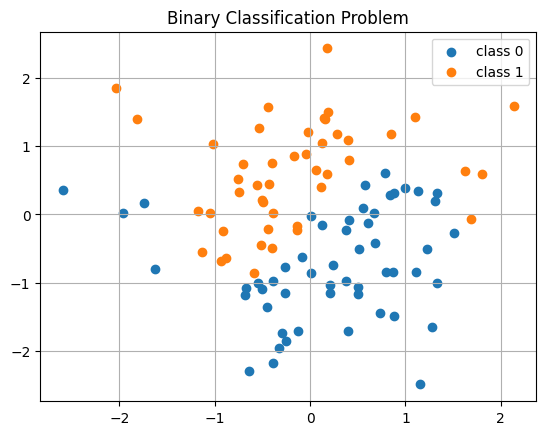

In [11]:
x_train_clf = torch.randn(100, 2)


def f(x):
    if x[1] > torch.sin(2 * x[0]):
        return 1
    return 0


y_train_clf = torch.tensor([f(x) for x in x_train_clf])
plt.scatter(
    x_train_clf[y_train_clf == 0, 0], x_train_clf[y_train_clf == 0, 1], label="class 0"
)
plt.scatter(
    x_train_clf[y_train_clf == 1, 0], x_train_clf[y_train_clf == 1, 1], label="class 1"
)
plt.legend()
plt.grid()
plt.title("Binary Classification Problem")
plt.show()

Here is an implementation of the softmax function, which is used as the activation in the last layer for classification. The output has the same shape as the input, with each row being a probability vector. For a single $x$ of shape `(d,)`, we have

$$\text{softmax}(x) = \left(\frac{e^{x_1}}{\sum_i e^{x_i}}, \dots, \frac{e^{x_d}}{\sum_i e^{x_i}}\right).$$

Hence the output also has $d$ coordinates, each non-negative and summing to 1, so it can be interpreted as a probability distribution.

In [12]:
def softmax(x):
    exp_x = torch.exp(x - x.max(dim=1, keepdim=True).values)  # For numerical stability
    return exp_x / exp_x.sum(dim=1, keepdim=True)  # Proper broadcasting


# example
X = torch.tensor([[10, 1], [8, 3], [-1, 2.0], [3.0, 3.1]])
Y = softmax(X)
print(f"Sums of each row: {Y.sum(dim=1)}")
Y

Sums of each row: tensor([1., 1., 1., 1.])


tensor([[9.9988e-01, 1.2339e-04],
        [9.9331e-01, 6.6929e-03],
        [4.7426e-02, 9.5257e-01],
        [4.7502e-01, 5.2498e-01]])

#### **(10 pts) Problem 4: Classification**

(a) Modify the `SimpleNetwork` class to build a neural network for the binary classification problem above:

input $x$ $\rightarrow$ `Linear` with `n_hidden` $\rightarrow$ ReLU $\rightarrow$ `Linear` with `out_features`=2 $\rightarrow$ softmax $\rightarrow$ output $(\hat{y}_0,\hat{y}_1)$

(b) Instantiate the network with `n_hidden=3`.

(c) Compute the binary cross entropy loss (implementation provided) for the network on the training data.

---

In [13]:
class SimpleNetworkClassifier:
    def __init__(self, in_features, n_hidden=2):
        # BEGIN SOLUTION
        self.layer1 = Linear(in_features, n_hidden)
        self.layer2 = Linear(n_hidden, 2)
        # END SOLUTION

    def forward(self, x):
        # BEGIN SOLUTION
        h = self.layer1(x)
        h = relu(h)
        h = self.layer2(h)
        return softmax(h)
        # END SOLUTION


# Test the classifier
test_clf = SimpleNetworkClassifier(in_features=2, n_hidden=3)
test_X = torch.rand(10, 2)
test_y = test_clf.forward(test_X)

# Visible test assertions
assert test_y.shape == (10, 2), f"Output shape should be (10, 2), got {test_y.shape}"
assert hasattr(test_clf, "layer1"), "Model should have layer1"
assert hasattr(test_clf, "layer2"), "Model should have layer2"
assert test_clf.layer1.in_features == 2, "layer1 should have 2 input features"
assert test_clf.layer1.out_features == 3, "layer1 should have 3 output features (n_hidden)"
assert test_clf.layer2.in_features == 3, "layer2 should have 3 input features"
assert test_clf.layer2.out_features == 2, "layer2 should have 2 output features (for 2 classes)"
assert torch.allclose(test_y.sum(dim=1), torch.ones(10)), "Each row should sum to 1 (softmax output)"
assert torch.all(test_y >= 0) and torch.all(test_y <= 1), "All probabilities should be between 0 and 1"
# BEGIN HIDDEN TESTS
test_clf2 = SimpleNetworkClassifier(in_features=5, n_hidden=10)
test_X2 = torch.rand(20, 5)
test_y2 = test_clf2.forward(test_X2)
assert test_y2.shape == (20, 2), f"Output shape should be (20, 2), got {test_y2.shape}"
assert test_clf2.layer1.in_features == 5, "layer1 should have 5 input features"
assert test_clf2.layer1.out_features == 10, "layer1 should have 10 output features"
assert torch.allclose(test_y2.sum(dim=1), torch.ones(20)), "Softmax outputs should sum to 1"
# END HIDDEN TESTS
print("All tests passed!")

All tests passed!


In [14]:
model_clf = SimpleNetworkClassifier(in_features=2, n_hidden=3)
y_predicted = model_clf.forward(x_train_clf)  # (n,2)
print("Here are the predicted probabilities for the first 5 data points")
y_predicted[:5, :]

Here are the predicted probabilities for the first 5 data points


tensor([[0.8796, 0.1204],
        [0.9257, 0.0743],
        [0.5070, 0.4930],
        [0.8867, 0.1133],
        [0.9249, 0.0751]])

A common choice of loss is the binary cross entropy loss, which is implemented below.

In [15]:
def binary_cross_entropy(y_true, y_pred):
    # y_pred is P(y=1), shape (n,) -> one column of y_predicted
    epsilon = 1e-15  # To avoid log(0)
    y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)  # Clamp for stability
    loss = -(y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred))
    return torch.mean(loss)

In [16]:
binary_cross_entropy(y_train_clf.float(), y_predicted[:, 1])

tensor(0.6461)

Congrats! You now can build neural networks for both regression and classification using fully connected layers with just PyTorch tensors. When we learn PyTorch's neural network module (`torch.nn`), building a model will seem very similar to this, but using the built-in torch versions of the layers, activations and loss. Finally, we will see how to actually train such models using automatic differentiation.

# Part 2: Neural networks in matrix form

Following the book, we'll take a look at how neural networks can be represented in matrix form.  We'll start with a simple network with one input, one output, and three hidden units.  We'll be using `numpy` for the implementation.

Define the Rectified Linear Unit (ReLU) function:

In [17]:
def ReLU(preactivation):
    return preactivation.clip(0.0)

Define a shallow neural network with, one input, one output, and three hidden units as a function.

NOTE: Python allows passing another function (`activation_fn`) as an argument to a function without any special syntax.

In [18]:
def shallow_1_1_3(
    x,
    activation_fn,
    phi_0,
    phi_1,
    phi_2,
    phi_3,
    theta_10,
    theta_11,
    theta_20,
    theta_21,
    theta_30,
    theta_31,
):
    # Initial lines
    pre_1 = theta_10 + theta_11 * x
    pre_2 = theta_20 + theta_21 * x
    pre_3 = theta_30 + theta_31 * x

    # Activation functions
    act_1 = activation_fn(pre_1)
    act_2 = activation_fn(pre_2)
    act_3 = activation_fn(pre_3)

    # Weight activations
    w_act_1 = phi_1 * act_1
    w_act_2 = phi_2 * act_2
    w_act_3 = phi_3 * act_3

    # Combine weighted activation and add y offset
    y = phi_0 + w_act_1 + w_act_2 + w_act_3

    # Return everything we have calculated

    return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

For plotting, we'll assume input in is range [-1,1] and output [-1,1]

In [19]:
def plot_neural(x, y):
    _fig, ax = plt.subplots()
    ax.plot(x.T, y.T)
    ax.set_xlabel("Input")
    ax.set_ylabel("Output")
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_aspect(1.0)
    plt.show()

Let's define a network.  We'll just consider the inputs and outputs over the range [-1,1].

In [20]:
# Now lets define some parameters and run the first neural network
n1_theta_10 = 0.0
n1_theta_11 = -1.0
n1_theta_20 = 0
n1_theta_21 = 1.0
n1_theta_30 = -0.67
n1_theta_31 = 1.0
n1_phi_0 = 1.0
n1_phi_1 = -2.0
n1_phi_2 = -3.0
n1_phi_3 = 9.3

In [21]:
# Define a range of input values
n1_in = np.arange(-1, 1, 0.01).reshape([1, -1])

In [22]:
# We run the neural network for each of these input values
n1_out, *_ = shallow_1_1_3(
    n1_in,
    ReLU,
    n1_phi_0,
    n1_phi_1,
    n1_phi_2,
    n1_phi_3,
    n1_theta_10,
    n1_theta_11,
    n1_theta_20,
    n1_theta_21,
    n1_theta_30,
    n1_theta_31,
)

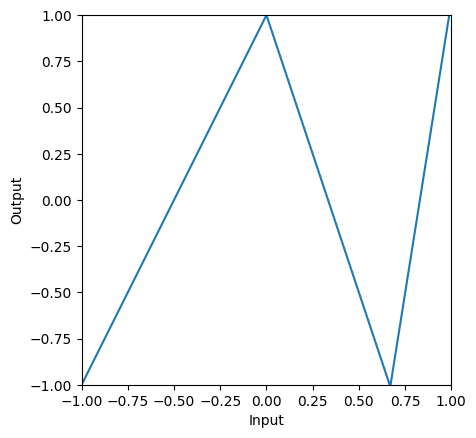

In [23]:
# And then plot it
plot_neural(n1_in, n1_out)

## Matrix form

Now we'll define the same neural network, but this time, we will  use matrix form as in equation 4.15.  When you get this right, it will draw the same plot as above.

#### **(10 pts) Problem 5: Matrix Form of Neural Network**

The problem neural network used above can also be defined in matrix form, namely:
$$h_1 = \text{ReLU}(\beta_0 + \Omega_0 x)$$
and
$$y = \beta_1 + \Omega_1 h_1$$




Fill in the values of the $\beta$ and $\Omega$ matrices with the `n1_theta`, `n1_phi`, etc. parameters from the that define the network in the previous example above.

NOTE THAT MATRICES ARE CONVENTIONALLY INDEXED WITH a_11 IN THE TOP LEFT CORNER, BUT NDARRAYS START AT [0,0].

To get you started we've filled in a couple:

In [24]:
beta_0 = np.zeros((3, 1))
Omega_0 = np.zeros((3, 1))
beta_1 = np.zeros((1, 1))
Omega_1 = np.zeros((1, 3))

# BEGIN SOLUTION
beta_0[0, 0] = n1_theta_10
Omega_0[0, 0] = n1_theta_11
beta_0[1, 0] = n1_theta_20
Omega_0[1, 0] = n1_theta_21
beta_0[2, 0] = n1_theta_30
Omega_0[2, 0] = n1_theta_31
beta_1[0, 0] = n1_phi_0
Omega_1[0, 0] = n1_phi_1
Omega_1[0, 1] = n1_phi_2
Omega_1[0, 2] = n1_phi_3
# END SOLUTION

# Test assertions
assert beta_0.shape == (3, 1), f"beta_0 should have shape (3, 1), got {beta_0.shape}"
assert Omega_0.shape == (3, 1), f"Omega_0 should have shape (3, 1), got {Omega_0.shape}"
assert beta_1.shape == (1, 1), f"beta_1 should have shape (1, 1), got {beta_1.shape}"
assert Omega_1.shape == (1, 3), f"Omega_1 should have shape (1, 3), got {Omega_1.shape}"
assert np.isclose(beta_0[0, 0], n1_theta_10), "beta_0[0,0] should equal n1_theta_10"
assert np.isclose(Omega_0[0, 0], n1_theta_11), "Omega_0[0,0] should equal n1_theta_11"
assert np.isclose(beta_1[0, 0], n1_phi_0), "beta_1[0,0] should equal n1_phi_0"
# BEGIN HIDDEN TESTS
assert np.isclose(beta_0[1, 0], n1_theta_20), "beta_0[1,0] should equal n1_theta_20"
assert np.isclose(beta_0[2, 0], n1_theta_30), "beta_0[2,0] should equal n1_theta_30"
assert np.isclose(Omega_0[1, 0], n1_theta_21), "Omega_0[1,0] should equal n1_theta_21"
assert np.isclose(Omega_0[2, 0], n1_theta_31), "Omega_0[2,0] should equal n1_theta_31"
assert np.isclose(Omega_1[0, 0], n1_phi_1), "Omega_1[0,0] should equal n1_phi_1"
assert np.isclose(Omega_1[0, 1], n1_phi_2), "Omega_1[0,1] should equal n1_phi_2"
assert np.isclose(Omega_1[0, 2], n1_phi_3), "Omega_1[0,2] should equal n1_phi_3"
# END HIDDEN TESTS
print("All tests passed!")

All tests passed!


The following cell will then run the network in matrix form; you can compare whether you obtain the same result:

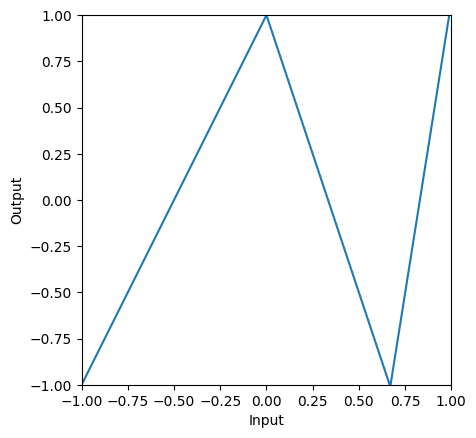

In [25]:
# Make sure that input data matrix has different inputs in its columns
n_data = n1_in.size
n_dim_in = 1
n1_in_mat = np.reshape(n1_in, (n_dim_in, n_data))

# This runs the network for ALL of the inputs, x at once so we can draw graph
h1 = ReLU(beta_0 + np.matmul(Omega_0, n1_in_mat))
n1_out = beta_1 + np.matmul(Omega_1, h1)

# Draw the network and check that it looks the same as the non-matrix case
plot_neural(n1_in, n1_out)

### Composing networks

Now we'll feed the output of the first network into the second one.

In [26]:
# Now lets define some parameters and run the second neural network
n2_theta_10 = -0.6
n2_theta_11 = -1.0
n2_theta_20 = 0.2
n2_theta_21 = 1.0
n2_theta_30 = -0.5
n2_theta_31 = 1.0
n2_phi_0 = 0.5
n2_phi_1 = -1.0
n2_phi_2 = -1.5
n2_phi_3 = 2.0

# Define a range of input values
n2_in = np.arange(-1, 1, 0.01)

We run the second neural network on the output of the first network

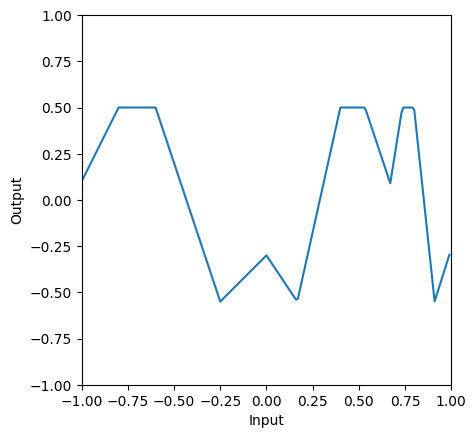

In [27]:
n2_out, *_ = shallow_1_1_3(
    n1_out,
    ReLU,
    n2_phi_0,
    n2_phi_1,
    n2_phi_2,
    n2_phi_3,
    n2_theta_10,
    n2_theta_11,
    n2_theta_20,
    n2_theta_21,
    n2_theta_30,
    n2_theta_31,
)
# And then plot it
plot_neural(n1_in, n2_out)

### 3-layer network

Now let's make a deep network with 3 hidden layers.  It will have $D_i=4$ inputs, $D_1=5$ neurons  in the first layer, $D_2=2$ neurons in the second layer and $D_3=4$ neurons in the third layer, and $D_o = 1$ output.  Consult figure 4.6 and equations 4.15 for guidance.

In [28]:
# define sizes
D_i = 4
D_1 = 5
D_2 = 2
D_3 = 4
D_o = 1

#### **(10 pts) Problem 6: Deep Network Parameter Initialization**

We'll choose the inputs and parameters of this network randomly using `np.random.normal`
For example, we'll set the input using:

In [29]:
n_data = 4
x = np.random.normal(size=(D_i, n_data))

Now, the task is for you to initialize the parameters with Gaussian noise as well. Pay attention to the correct dimensions!

In [30]:
n_data = 4
x = np.random.normal(size=(D_i, n_data))

# BEGIN SOLUTION
beta_0 = np.random.normal(size=(D_1, 1))
Omega_0 = np.random.normal(size=(D_1, D_i))
beta_1 = np.random.normal(size=(D_2, 1))
Omega_1 = np.random.normal(size=(D_2, D_1))
beta_2 = np.random.normal(size=(D_3, 1))
Omega_2 = np.random.normal(size=(D_3, D_2))
beta_3 = np.random.normal(size=(D_o, 1))
Omega_3 = np.random.normal(size=(D_o, D_3))
# END SOLUTION

# Test assertions for correct shapes
assert beta_0.shape == (D_1, 1), f"beta_0 should have shape ({D_1}, 1), got {beta_0.shape}"
assert Omega_0.shape == (D_1, D_i), f"Omega_0 should have shape ({D_1}, {D_i}), got {Omega_0.shape}"
assert beta_1.shape == (D_2, 1), f"beta_1 should have shape ({D_2}, 1), got {beta_1.shape}"
assert Omega_1.shape == (D_2, D_1), f"Omega_1 should have shape ({D_2}, {D_1}), got {Omega_1.shape}"
assert beta_2.shape == (D_3, 1), f"beta_2 should have shape ({D_3}, 1), got {beta_2.shape}"
assert Omega_2.shape == (D_3, D_2), f"Omega_2 should have shape ({D_3}, {D_2}), got {Omega_2.shape}"
assert beta_3.shape == (D_o, 1), f"beta_3 should have shape ({D_o}, 1), got {beta_3.shape}"
assert Omega_3.shape == (D_o, D_3), f"Omega_3 should have shape ({D_o}, {D_3}), got {Omega_3.shape}"
# BEGIN HIDDEN TESTS
# Verify matrices are actually filled with values (not zeros)
assert not np.allclose(beta_0, 0), "beta_0 should be initialized with random values, not zeros"
assert not np.allclose(Omega_0, 0), "Omega_0 should be initialized with random values, not zeros"
assert not np.allclose(beta_1, 0), "beta_1 should be initialized with random values, not zeros"
assert not np.allclose(Omega_1, 0), "Omega_1 should be initialized with random values, not zeros"
assert not np.allclose(beta_2, 0), "beta_2 should be initialized with random values, not zeros"
assert not np.allclose(Omega_2, 0), "Omega_2 should be initialized with random values, not zeros"
assert not np.allclose(beta_3, 0), "beta_3 should be initialized with random values, not zeros"
assert not np.allclose(Omega_3, 0), "Omega_3 should be initialized with random values, not zeros"
# END HIDDEN TESTS
print("All tests passed!")

All tests passed!


You can test your solution below: if you set the correct sizes, the following code will run:

In [31]:
h1 = ReLU(beta_0 + np.matmul(Omega_0, x))
h2 = ReLU(beta_1 + np.matmul(Omega_1, h1))
h3 = ReLU(beta_2 + np.matmul(Omega_2, h2))
y = beta_3 + np.matmul(Omega_3, h3)

if h1.shape[0] != D_1 or h1.shape[1] != n_data:
    print("h1 is wrong shape")
if h2.shape[0] != D_2 or h1.shape[1] != n_data:
    print("h2 is wrong shape")
if h3.shape[0] != D_3 or h1.shape[1] != n_data:
    print("h3 is wrong shape")
if y.shape[0] != D_o or h1.shape[1] != n_data:
    print("Output is wrong shape")

# Print the inputs and outputs
print("Input data points")
print(x)
print("Output data points")
print(y)

Input data points
[[-0.61864181 -0.77112415 -0.35490677  1.504479  ]
 [ 0.90205522 -0.80635701  1.55570267 -1.34491403]
 [ 0.51282089 -1.4992819  -0.93145041 -0.62042967]
 [ 1.18911207  0.50827206 -0.67577629 -1.02127521]]
Output data points
[[0.1772679  0.17147045 0.1772679  0.12041507]]


# Part 3: Regression / Least squares loss

We are going to be using a shallow neural network to perform regression:

In [32]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
    return preactivation.clip(0.0)


# Define a shallow neural network
def shallow_nn(x, beta_0, omega_0, beta_1, omega_1):
    # Make sure that input data is (1 x n_data) array
    n_data = x.size
    x = np.reshape(x, (1, n_data))

    # This runs the network for ALL of the inputs, x at once so we can draw graph
    h1 = ReLU(np.matmul(beta_0, np.ones((1, n_data))) + np.matmul(omega_0, x))
    return np.matmul(beta_1, np.ones((1, n_data))) + np.matmul(omega_1, h1)

In [33]:
# Get parameters for model -- we can call this function to easily reset them
def get_parameters():
    # And we'll create a network that approximately fits it
    beta_0 = np.zeros((3, 1))  # formerly theta_x0
    omega_0 = np.zeros((3, 1))  # formerly theta_x1
    beta_1 = np.zeros((1, 1))  # formerly phi_0
    omega_1 = np.zeros((1, 3))  # formerly phi_x

    beta_0[0, 0] = 0.3
    beta_0[1, 0] = -1.0
    beta_0[2, 0] = -0.5
    omega_0[0, 0] = -1.0
    omega_0[1, 0] = 1.8
    omega_0[2, 0] = 0.65
    beta_1[0, 0] = 0.1
    omega_1[0, 0] = -2.0
    omega_1[0, 1] = -1.0
    omega_1[0, 2] = 7.0

    return beta_0, omega_0, beta_1, omega_1

In [34]:
# Utility function for plotting data
def plot_univariate_regression(
    x_model, y_model, x_data=None, y_data=None, sigma_model=None, title=None
):
    # Make sure model data are 1D arrays
    x_model = np.squeeze(x_model)
    y_model = np.squeeze(y_model)

    _fig, ax = plt.subplots()
    ax.plot(x_model, y_model)
    if sigma_model is not None:
        ax.fill_between(
            x_model,
            y_model - 2 * sigma_model,
            y_model + 2 * sigma_model,
            color="lightgray",
        )
    ax.set_xlabel(r"Input, $x$")
    ax.set_ylabel(r"Output, $y$")
    ax.set_xlim([0, 1])
    ax.set_ylim([-1, 1])
    ax.set_aspect(0.5)
    if title is not None:
        ax.set_title(title)
    if x_data is not None:
        ax.plot(x_data, y_data, "ko")
    plt.show()

## Univariate regression

We'll investigate a simple univariate regression situation with a single input $x$ and a single output $y$ as pictured in figures 5.4 and 5.5b in the book.

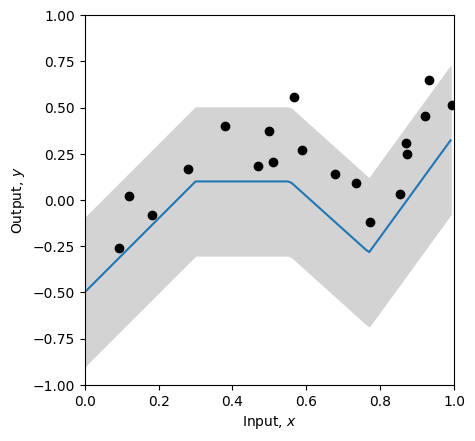

In [35]:
# Let's create some 1D training data
x_train = np.array(
    [
        0.09291784,
        0.46809093,
        0.93089486,
        0.67612654,
        0.73441752,
        0.86847339,
        0.49873225,
        0.51083168,
        0.18343972,
        0.99380898,
        0.27840809,
        0.38028817,
        0.12055708,
        0.56715537,
        0.92005746,
        0.77072270,
        0.85278176,
        0.05315950,
        0.87168699,
        0.58858043,
    ]
)
y_train = np.array(
    [
        -0.25934537,
        0.18195445,
        0.651270150,
        0.13921448,
        0.09366691,
        0.30567674,
        0.372291170,
        0.20716968,
        -0.08131792,
        0.51187806,
        0.16943738,
        0.3994327,
        0.019062570,
        0.55820410,
        0.452564960,
        -0.1183121,
        0.02957665,
        -1.24354444,
        0.248038840,
        0.26824970,
    ]
)

# Get parameters for the model
beta_0, omega_0, beta_1, omega_1 = get_parameters()
sigma = 0.2

# Define a range of input values
x_model = np.arange(0, 1, 0.01)
# Run the model to get values to plot and plot it.
y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model=sigma)

The blue line is the mean prediction of the model and the gray area represents plus/minus two standard deviations.  This model fits okay, but could be improved. Let's compute the loss.  We'll compute the  the least squares error, the likelihood, the negative log likelihood.

#### **(5 pts) Problem 7: Normal Distribution**

Implement a function that returns the probability under the normal distribution.
$$\operatorname{Pr}\left(y \mid \mu, \sigma^2\right)=\frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left[-\frac{(y-\mu)^2}{2 \sigma^2}\right]$$

You will need np.sqrt() and np.exp(), and math.pi
(Don't use the numpy version -- that's cheating!)

In [36]:
def normal_distribution(y, mu, sigma):
    # BEGIN SOLUTION
    return (
        1 / (np.sqrt(2 * np.pi * sigma**2)) * np.exp(-((y - mu) ** 2) / (2 * sigma**2))
    )
    # END SOLUTION

In [37]:
# Let's double check we get the right answer before proceeding
print(
    "Correct answer = {:3.3f}, Your answer = {:3.3f}".format(
        0.119, normal_distribution(1, -1, 2.3)
    )
)

# Visible test assertions
assert np.isclose(normal_distribution(1, -1, 2.3), 0.119, atol=0.001), "normal_distribution(1, -1, 2.3) should be approximately 0.119"
assert np.isclose(normal_distribution(0, 0, 1), 1/np.sqrt(2*np.pi), atol=1e-6), "normal_distribution at mean with sigma=1 should be 1/sqrt(2*pi)"
assert normal_distribution(0, 0, 1) > normal_distribution(1, 0, 1), "Probability should be higher at the mean"
# BEGIN HIDDEN TESTS
assert np.isclose(normal_distribution(0, 0, 1), 0.3989422804014327, atol=1e-6), "Normal distribution at mean with sigma=1 should be ~0.399"
assert np.isclose(normal_distribution(2, 2, 0.5), 0.7978845608028654, atol=1e-6), "Normal distribution at mean with sigma=0.5 should be ~0.798"
# END HIDDEN TESTS
print("All tests passed!")

Correct answer = 0.119, Your answer = 0.119
All tests passed!


#### **(5 pts) Problem 8: Gaussian Distribution Behavior**

Let's plot the Gaussian distribution.

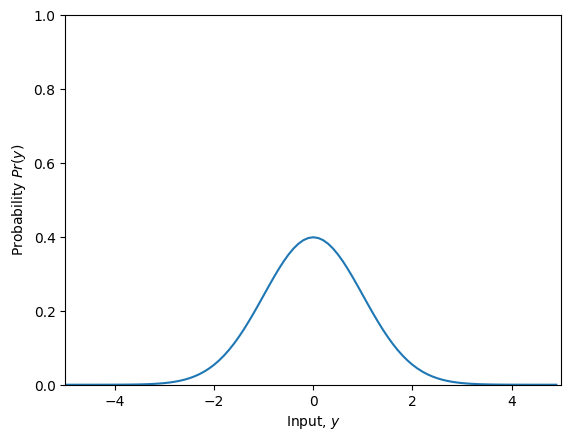

In [38]:
y_gauss = np.arange(-5, 5, 0.1)
mu = 0
sigma = 1.0
gauss_prob = normal_distribution(y_gauss, mu, sigma)
fig, ax = plt.subplots()
ax.plot(y_gauss, gauss_prob)
ax.set_xlabel(r"Input, $y$")
ax.set_ylabel(r"Probability $Pr(y)$")
ax.set_xlim([-5, 5])
ax.set_ylim([0, 1.0])
plt.show()

1. Predict what will happen if we change to mu=1 and leave sigma=1
(you can  change the code above and see if you were correct).

(Type your answer here)

2. Predict what will happen if we leave mu = 0 and change sigma to 2.0

(Type your answer here)

3. Predict what will happen if we leave mu = 0 and change sigma to 0.5

(Type your answer here)

In [39]:
# Problem 8 verification: students should have answered the questions above
# This cell verifies understanding of Gaussian distribution behavior

# BEGIN SOLUTION
# Expected answers (for instructor reference):
# 1. mu=1: The curve shifts right by 1 unit (peak moves from x=0 to x=1)
# 2. sigma=2: The curve becomes wider/flatter (more spread out)
# 3. sigma=0.5: The curve becomes narrower/taller (less spread out)
problem_8_completed = True
# END SOLUTION

# Test assertions
assert problem_8_completed == True, "Please complete the text answers above"
# BEGIN HIDDEN TESTS
assert isinstance(problem_8_completed, bool), "problem_8_completed should be a boolean"
# END HIDDEN TESTS
print("Problem 8 complete - verify your text answers above match the expected behavior!")

Problem 8 complete - verify your text answers above match the expected behavior!


## Likelihood, etc.

#### **(5 pts) Problem 9: Likelihood**

Now let's compute the likelihood using this function

$$
\prod_{i=1}^I \operatorname{Pr}\left(\mathbf{y}_i \mid \mathbf{f}\left[\mathbf{x}_i, \phi\right]\right)
$$

In [40]:
# Return the likelihood of all of the data under the model
def compute_likelihood(y_train, mu, sigma):
    # BEGIN SOLUTION
    return np.prod(normal_distribution(y_train, mu, sigma))
    # END SOLUTION


# Visible test assertions
test_likelihood = compute_likelihood(np.array([0.0]), np.array([0.0]), 1.0)
expected_test = 1 / np.sqrt(2 * np.pi)
assert np.isclose(test_likelihood, expected_test, atol=1e-6), f"Likelihood for single zero should be {expected_test}"
assert compute_likelihood(np.array([0.0, 0.0]), np.array([0.0, 0.0]), 1.0) < test_likelihood, "Likelihood should decrease with more data points"
# BEGIN HIDDEN TESTS
simple_likelihood = compute_likelihood(np.array([0.0, 0.0]), np.array([0.0, 0.0]), 1.0)
expected_simple = (1 / np.sqrt(2 * np.pi)) ** 2
assert np.isclose(simple_likelihood, expected_simple, atol=1e-6), f"Likelihood for zeros should be {expected_simple}, got {simple_likelihood}"
# END HIDDEN TESTS
print("All tests passed!")

All tests passed!


In [41]:
# Let's test this for a homoscedastic (constant sigma) model
beta_0, omega_0, beta_1, omega_1 = get_parameters()
# Use our neural network to predict the mean of the Gaussian
mu_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
# Set the standard deviation to something reasonable
sigma = 0.2
# Compute the likelihood
likelihood = compute_likelihood(y_train, mu_pred, sigma)
# Let's double check we get the right answer before proceeding
print("Correct answer = {:9.9f}, Your answer = {:9.9f}".format(0.000010624, likelihood))

# BEGIN HIDDEN TESTS
simple_likelihood = compute_likelihood(np.array([0.0, 0.0]), np.array([0.0, 0.0]), 1.0)
expected_simple = (1 / np.sqrt(2 * np.pi)) ** 2
assert np.isclose(simple_likelihood, expected_simple, atol=1e-6), f"Likelihood for zeros should be {expected_simple}, got {simple_likelihood}"
# END HIDDEN TESTS

Correct answer = 0.000010624, Your answer = 0.000010624


You can see that this gives a very small answer, even for this small 1D dataset, and with the model fitting quite well.  This is because it is the product of several probabilities, which are all quite small themselves.
This will get out of hand pretty quickly with real datasets -- the likelihood will get so small that we can't represent it with normal finite-precision math.

#### **(5 pts) Problem 10: Negative Log Likelihood**

This is why we use negative log likelihood:

$$
-\sum_{i=1}^I \log \left[\operatorname{Pr}\left(\mathbf{y}_i \mid \mathbf{f}\left[\mathbf{x}_i, \phi\right]\right)\right]
$$

In [42]:
# Return the negative log likelihood of the data under the model
def compute_negative_log_likelihood(y_train, mu, sigma):
    # BEGIN SOLUTION
    return -np.sum(np.log(normal_distribution(y_train, mu, sigma)))
    # END SOLUTION


# Visible test assertions
test_nll_single = compute_negative_log_likelihood(np.array([0.0]), np.array([0.0]), 1.0)
expected_nll_single = -np.log(1 / np.sqrt(2 * np.pi))
assert np.isclose(test_nll_single, expected_nll_single, atol=1e-6), f"NLL for single zero should be {expected_nll_single}"
test_nll_double = compute_negative_log_likelihood(np.array([0.0, 0.0]), np.array([0.0, 0.0]), 1.0)
assert np.isclose(test_nll_double, 2 * expected_nll_single, atol=1e-6), "NLL should be additive"
# BEGIN HIDDEN TESTS
simple_nll = compute_negative_log_likelihood(np.array([0.0, 0.0]), np.array([0.0, 0.0]), 1.0)
expected_simple_nll = -2 * np.log(1 / np.sqrt(2 * np.pi))
assert np.isclose(simple_nll, expected_simple_nll, atol=1e-6), f"NLL for zeros with sigma=1 should be {expected_simple_nll}, got {simple_nll}"
# END HIDDEN TESTS
print("All tests passed!")

All tests passed!


In [43]:
# Let's test this for a homoscedastic (constant sigma) model
beta_0, omega_0, beta_1, omega_1 = get_parameters()
# Use our neural network to predict the mean of the Gaussian
mu_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
# Set the standard deviation to something reasonable
sigma = 0.2
# Compute the negative log likelihood
nll = compute_negative_log_likelihood(y_train, mu_pred, sigma)
# Let's double check we get the right answer before proceeding
print("Correct answer = {:9.9f}, Your answer = {:9.9f}".format(11.452419564, nll))

# BEGIN HIDDEN TESTS
simple_nll = compute_negative_log_likelihood(np.array([0.0, 0.0]), np.array([0.0, 0.0]), 1.0)
expected_simple_nll = -2 * np.log(1 / np.sqrt(2 * np.pi))
assert np.isclose(simple_nll, expected_simple_nll, atol=1e-6), f"NLL for zeros with sigma=1 should be {expected_simple_nll}, got {simple_nll}"
# END HIDDEN TESTS

Correct answer = 11.452419564, Your answer = 11.452419564


#### **(5 pts) Problem 11: Sum of Squares**

For good measure, let's compute the sum of squares as well:

$$
\sum_{i=1}^I\left(y_i-\mathrm{f}\left[\mathbf{x}_i, \phi\right]\right)^2
$$

In [44]:
# Return squared distance between observed and predicted values
def compute_sum_of_squares(y_train, y_pred):
    # BEGIN SOLUTION
    return np.sum((y_train - y_pred) ** 2)
    # END SOLUTION


# Visible test assertions
assert np.isclose(compute_sum_of_squares(np.array([1.0, 2.0]), np.array([1.0, 2.0])), 0.0), "SOS should be 0 for identical arrays"
assert np.isclose(compute_sum_of_squares(np.array([0.0, 0.0]), np.array([1.0, 0.0])), 1.0), "SOS for [0,0] vs [1,0] should be 1"
assert np.isclose(compute_sum_of_squares(np.array([0.0, 0.0]), np.array([3.0, 4.0])), 25.0), "SOS for [0,0] vs [3,4] should be 25 (3^2+4^2)"
# BEGIN HIDDEN TESTS
simple_sos = compute_sum_of_squares(np.array([1.0, 2.0, 3.0]), np.array([2.0, 3.0, 4.0]))
assert np.isclose(simple_sos, 3.0, atol=1e-6), f"Sum of squares for [1,2,3] vs [2,3,4] should be 3.0, got {simple_sos}"
simple_sos2 = compute_sum_of_squares(np.array([0.0, 0.0, 0.0, 0.0]), np.array([1.0, 2.0, 3.0, 4.0]))
assert np.isclose(simple_sos2, 30.0, atol=1e-6), f"Sum of squares for [0,0,0,0] vs [1,2,3,4] should be 30.0, got {simple_sos2}"
# END HIDDEN TESTS
print("All tests passed!")

All tests passed!


In [45]:
# Let's test this again
beta_0, omega_0, beta_1, omega_1 = get_parameters()
# Use neural network to predict mean (best prediction of y)
y_pred = mu_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
# Compute the sum of squares
sum_of_squares = compute_sum_of_squares(y_train, y_pred)
# Let's double check we get the right answer before proceeding
print(
    "Correct answer = {:9.9f}, Your answer = {:9.9f}".format(
        2.020992572, sum_of_squares
    )
)

# BEGIN HIDDEN TESTS
simple_sos = compute_sum_of_squares(np.array([1.0, 2.0, 3.0]), np.array([2.0, 3.0, 4.0]))
assert np.isclose(simple_sos, 3.0, atol=1e-6), f"Sum of squares for [1,2,3] vs [2,3,4] should be 3.0, got {simple_sos}"
simple_sos2 = compute_sum_of_squares(np.array([0.0, 0.0, 0.0, 0.0]), np.array([1.0, 2.0, 3.0, 4.0]))
assert np.isclose(simple_sos2, 30.0, atol=1e-6), f"Sum of squares for [0,0,0,0] vs [1,2,3,4] should be 30.0, got {simple_sos2}"
# END HIDDEN TESTS

Correct answer = 2.020992572, Your answer = 2.020992572
